In [44]:
import pandas as pd
import numpy as np

In [6]:
# Remove transformation columns.
# Drop nulls
df = pd.read_csv('basketballData.csv').drop(["Unnamed: 0",
                                             "AwayWinFlag",
                                             "HomePts",
                                            "HomeScoringMargin",
                                             "HomeOffensiveEfficiency",
                                            "AwayPts",
                                             "AwayScoringMargin",
                                             "AwayOffensiveEfficiency",
                                            "NumHomeWins",
                                             "NumAwayWins",
                                             "HomeWinPctg",
                                             "AwayWinPctg",
                                            "TotalAwayGame",
                                             "TotalHomeGame",
                                             "HomeRollingOE",
                                             "AwayRollingOE",
                                            "HomeAvgScoringMargin",
                                             "AwayAvgScoringMargin"],axis=1).dropna()

In [7]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [8]:
df.sort_values("DATE")

,MATCHUP,GAME_ID,SEASON,DATE,HomeTeamID,AwayTeamID,HomeWinFlag,HomeNxtGameWinPctg,HomeNxtGameOE,HomeNxtGameASM,AwayNxtGameWinPctg,AwayNxtGameOE,AwayNxtGameASM
583,Trail Blazers at Clippers,21900115,2019-20,2019-11-07,1610612746,1610612757,1,0.800000,0.509889,7.4,0.600000,0.558082,0.6
719,Bucks at Thunder,21900135,2019-20,2019-11-10,1610612760,1610612749,0,0.666667,0.556835,10.0,0.666667,0.535040,10.2
582,Raptors at Clippers,21900145,2019-20,2019-11-11,1610612746,1610612761,1,0.833333,0.514177,6.6,0.600000,0.559348,7.0
750,Timberwolves at Pistons,21900140,2019-20,2019-11-11,1610612765,1610612750,0,0.600000,0.566802,0.6,0.600000,0.575231,1.4
858,76ers at Magic,21900155,2019-20,2019-11-13,1610612753,1610612755,1,0.500000,0.560234,0.2,0.500000,0.590691,-1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,Heat at Magic,22101227,2021-22,2022-04-10,1610612753,1610612748,1,0.275000,0.528992,-7.6,0.600000,0.539377,6.0
2450,Bulls at Timberwolves,22101224,2021-22,2022-04-10,1610612750,1610612741,0,0.650000,0.574206,3.8,0.450000,0.608822,-6.6
2589,Lakers at Nuggets,22101220,2021-22,2022-04-10,1610612743,1610612747,0,0.575000,0.584375,-3.2,0.275000,0.576790,-13.2
3358,Wizards at Hornets,22101217,2021-22,2022-04-10,1610612766,1610612764,1,0.525000,0.608445,3.4,0.350000,0.583495,-9.6


In [9]:
# Validation Data
valData = df[df["DATE"] > "2021-09-01"].iloc[:,6:]

# Training Data
trainData = df[df["DATE"] < "2021-09-01"].iloc[:,6:]

In [10]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1799 entries, 0 to 2138
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HomeWinFlag         1799 non-null   int64  
 1   HomeNxtGameWinPctg  1799 non-null   float64
 2   HomeNxtGameOE       1799 non-null   float64
 3   HomeNxtGameASM      1799 non-null   float64
 4   AwayNxtGameWinPctg  1799 non-null   float64
 5   AwayNxtGameOE       1799 non-null   float64
 6   AwayNxtGameASM      1799 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 112.4 KB


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing 
from sklearn import metrics 
from sklearn.metrics import classification_report

#Logistict Regression Model 
inputs = trainData.drop(['HomeWinFlag'],axis='columns').astype('float')
target = trainData['HomeWinFlag'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3) 


# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_data_train = scaler.transform(X_train) #May need to transpose? df.T

scaler.fit(X_test)
scaled_data_test = scaler.transform(X_test)

# Build Logistic Regression Model
model = LogisticRegression();

model.fit(scaled_data_train, y_train);
model.score(scaled_data_test,y_test)

0.6148148148148148

In [12]:
F1Score = cross_val_score(model,scaled_data_test,y_test,cv=12,scoring='f1_macro');
print("Logistic Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))

Logistic Model F1 Accuracy: 0.58 (+/- 0.14)


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

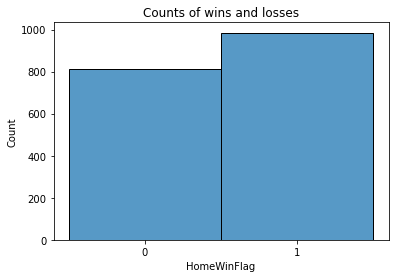

In [18]:
#More wins than losses? 
# MA columns removes data from the dataset
sns.histplot(x="HomeWinFlag", data=trainData,discrete=True);
plt.xticks([0,1]);
plt.title('Counts of wins and losses');

# XG Boost Model

In [22]:
from xgboost import XGBClassifier

In [27]:
# fit model no training data
model = XGBClassifier()
model.fit(scaled_data_train, y_train);
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [28]:
# Model accuracy
model.score(scaled_data_test,y_test)

0.5611111111111111

In [31]:
# F1 score on test data
F1Score = cross_val_score(model,scaled_data_test,y_test,cv=12,scoring='f1_macro');
print("XGBOOST Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))

XGBOOST Model F1 Accuracy: 0.58 (+/- 0.18)


In [32]:
# F1 Score on training data
F1Score = cross_val_score(model,scaled_data_train,y_train,cv=12,scoring='f1_macro');
print("XGBOOST Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))

XGBOOST Model F1 Accuracy: 0.58 (+/- 0.10)


# Artificial Neural Network

In [33]:
from tensorflow.keras import layers, models

In [52]:
# Build ANN

modelANN = models.Sequential([
    layers.Flatten(input_shape =(scaled_data_train.shape[1],)),
    layers.Dense(100,activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(2,activation='softmax')
])

modelANN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']);
modelANN.fit(X_train,y_train,epochs=100,verbose=0)

In [53]:
# Model accuracy
modelANN.evaluate(scaled_data_test,y_test);

17/17 [==============================] - 0s 687us/step - loss: 0.8059 - accuracy: 0.5889


In [54]:
# ANN's F1-Score

y_pred = modelANN.predict(scaled_data_test)

df = []
winLoss = [0,1]
for i in range(len(X_test)):
    df.append(winLoss[np.argmax(y_pred[i])])

y_pred = df    
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.68      0.58       229
           1       0.69      0.52      0.59       311

    accuracy                           0.59       540
   macro avg       0.60      0.60      0.59       540
weighted avg       0.61      0.59      0.59       540

